In [12]:
import sys
sys.path.append('../')

from src.m4_generator import M4Generator
from src.m4_data_loader import M4DataLoader
from src.visualization import *
from src.evaluation import *
from src.m4_generator import M4Generator
from src.m4_evaluation_loss_functions import *
from src.utils import *
from src.visualization import plot_serie_and_prediction

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers

import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Load Data Through Generator

In [13]:
EPOCHS = 1
BATCH_SIZE = 50
LOOKBACK = 48
HORIZON = 48
HIDDEN_LAYER_SIZE = 120
FEATURES_NUMBER = 2
OUTPUT_SIZE = HORIZON*2
PI_PARAMS = {'max_coff': 0.25, 'min_coff': 0.15, 'step': 0.1}

stdAugmentation = StdAugmentation(PI_PARAMS)
diffAugmentation = DiffAugmentation()
x_augmentations = []
y_augmentations = []

data_loader = M4DataLoader("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv", 
                           x_augmentations, 
                           y_augmentations,
                           LOOKBACK, HORIZON,  holdout_ratio=0.05)

train_x, train_y = data_loader.get_training_data()
test_x, test_y = data_loader.get_test_data()
validate_x, validate_y = data_loader.get_holdout_data()

training_data_generator = M4Generator(train_x, train_y, BATCH_SIZE, FEATURES_NUMBER)
test_data_generator = M4Generator(test_x, test_y, BATCH_SIZE, FEATURES_NUMBER)
holdout_data_generator = M4Generator(validate_x, validate_y, BATCH_SIZE, FEATURES_NUMBER)

In [14]:
data_loader.raw_train_data.shape

(414, 960)

# Decompose A Time Series
Decompose a time series to ( Seasonality, Trend, Residual). We note that the seasonality has frequencey of (24 hrs)


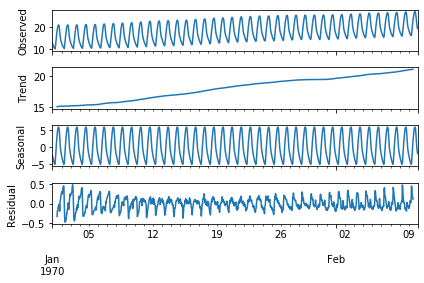

In [5]:
IDX = 300
x = data_loader.raw_train_data[IDX,:]
result = decompose_time_serie(x)

result.plot()
#plt.show()
plt.savefig('../../Presentations/second_pres/seasonality.png')

# Use Exponential Smoothing For Prediction
Exponential smoothing acts as a weighted moving average on the previous data points. The weights decreases exponentially as we move further in time. Here is an example of predicting a horizon of 48 time points for one time series using exponential smoothing from degree 3 ( i.e.: The smoothing is applied on the timeseries 3 components (Sesonality, Trend and Residual) )

/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


(48,)


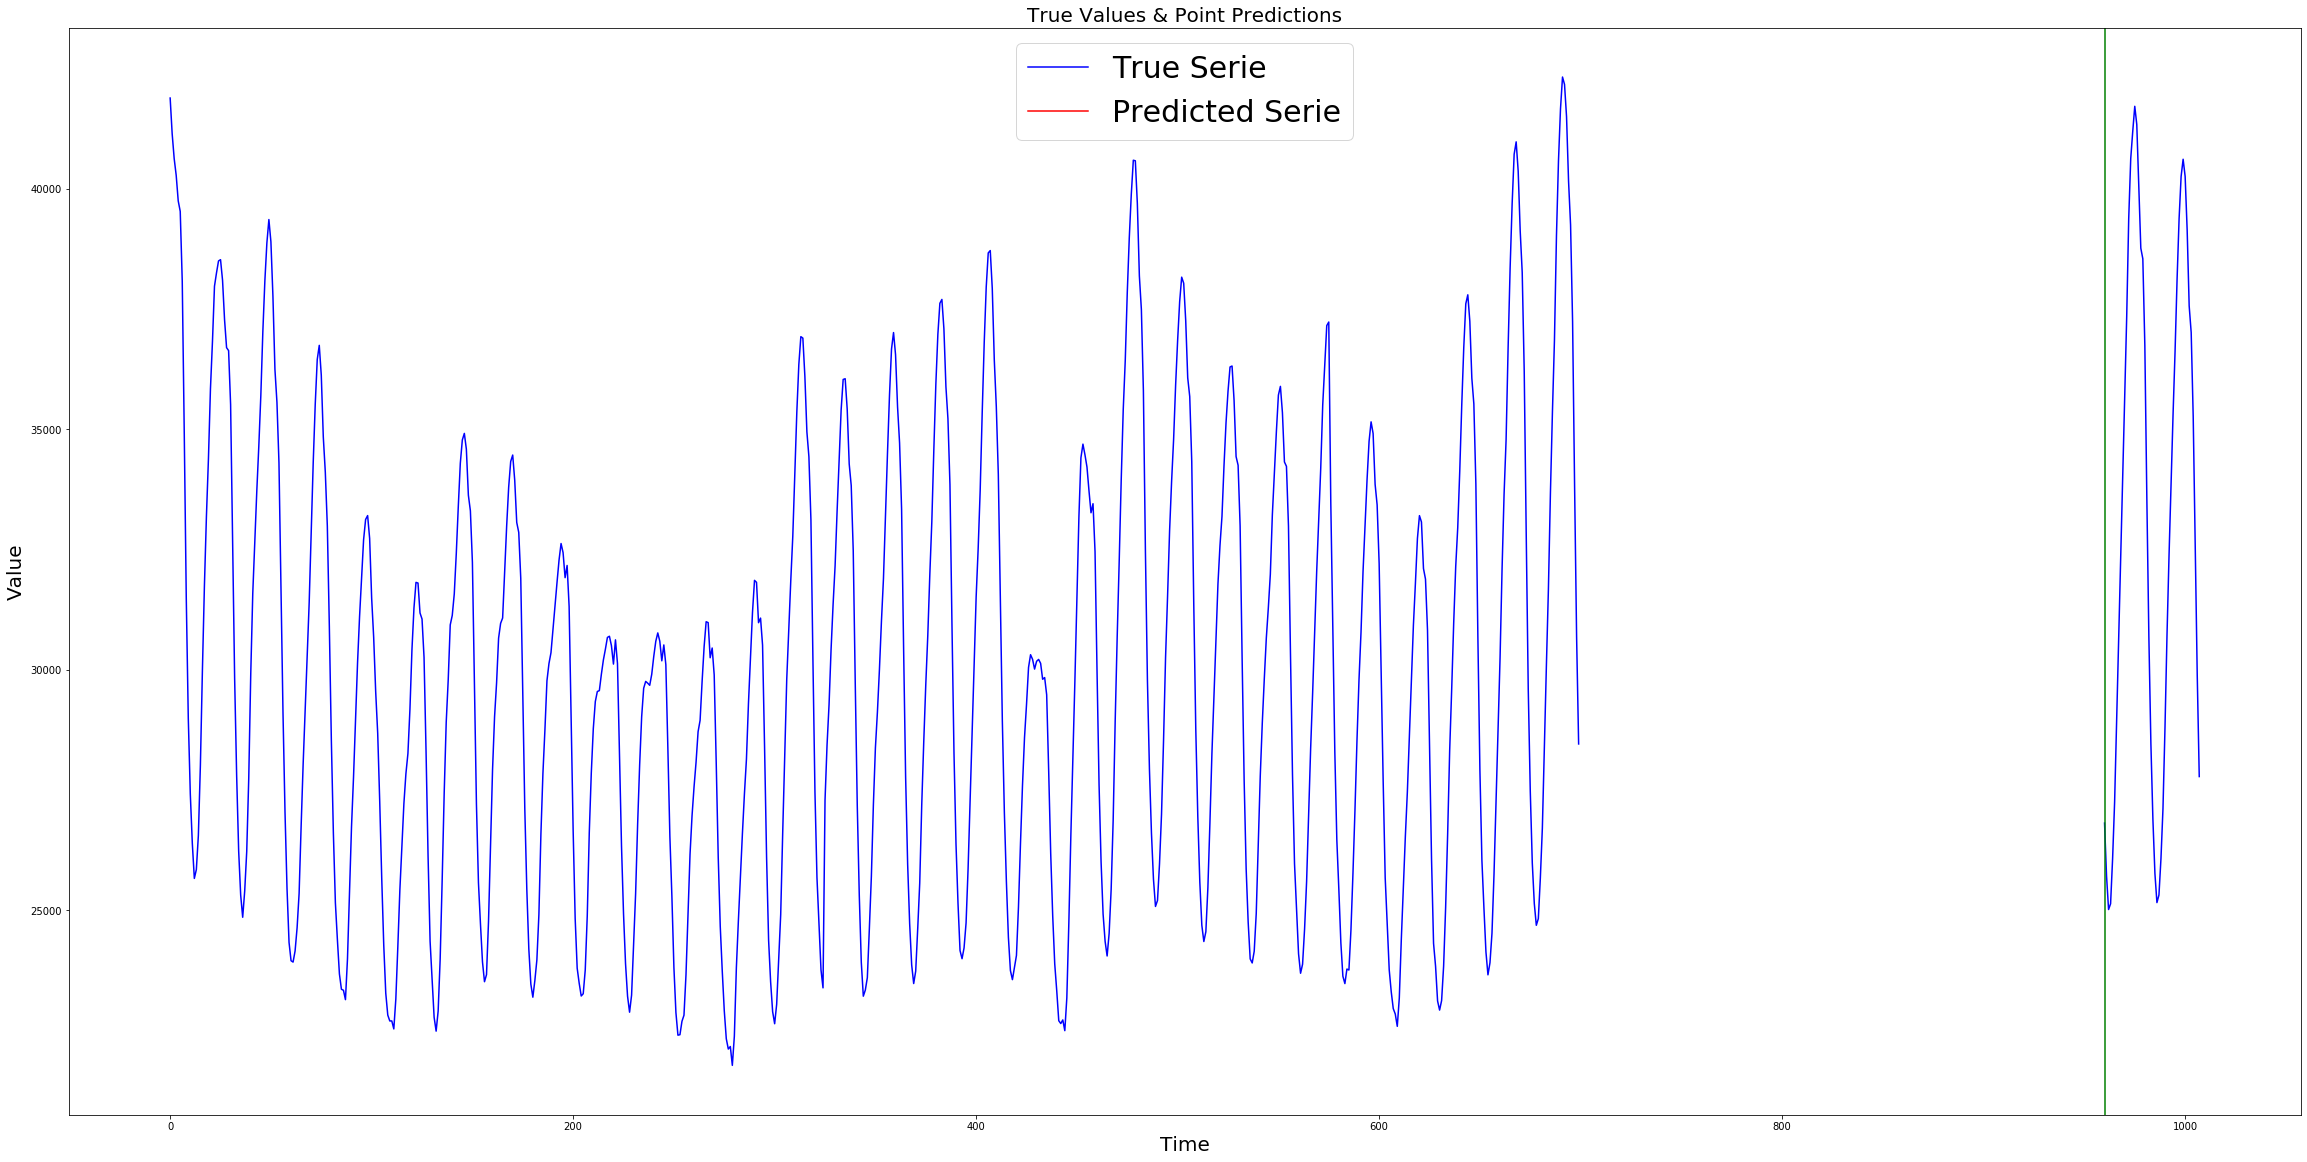

In [11]:
IDX = 10
x = data_loader.raw_train_data[IDX,:]
y = data_loader.raw_test_data[IDX, :]

prediction = exponential_smoothing(x)
print(prediction.shape)

plot_serie_and_prediction(x[:][np.newaxis], y[:][np.newaxis], prediction[:][np.newaxis])


# Exponential Smoothing Evaluation

In [7]:
loss = evaluate_exponential_smoothing(test_x, test_y, smape)
print(loss)

/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3

/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3

/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3

/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


67.62374582291908


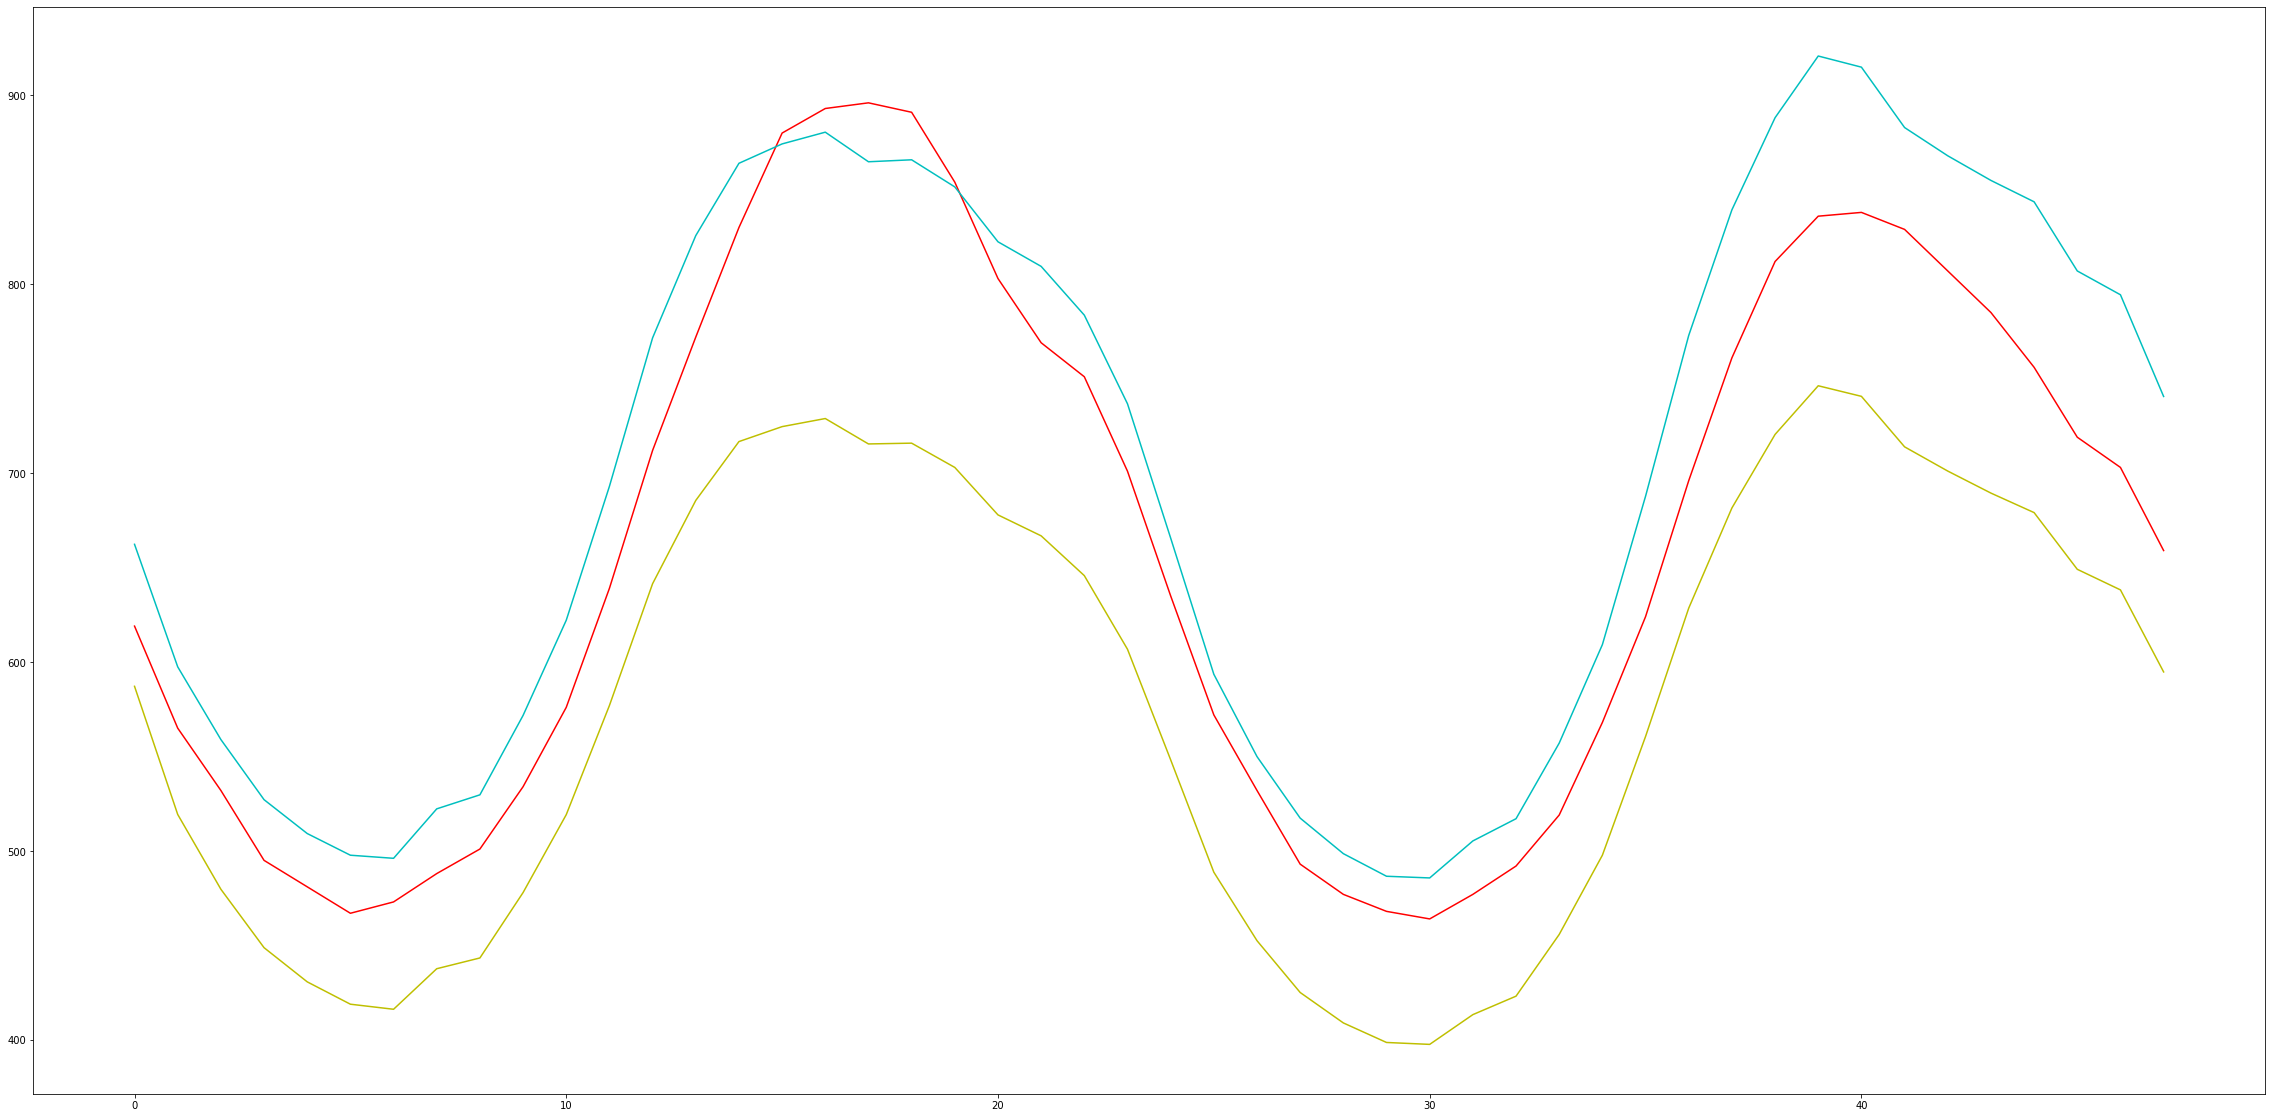

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

lower = np.array([587.133166666667,519.311166666667,479.713166666667,448.7835,430.6945,418.859833333333,416.1785,437.6425,443.339166666667,477.959166666667,519.193666666667,576.9785,641.4555,685.529166666667,716.682,724.600333333333,728.884833333333,715.4315,715.849166666667,702.998,677.8755,666.788166666667,645.724,606.755666666667,548.215833333333,488.733666666667,452.485166666667,425.057166666667,408.947,398.602166666667,397.5905,413.342333333333,423.118,455.783833333333,497.728,560.575166666667,628.525833333333,681.526166666667,720.465,746.229166666667,740.631333333333,713.899333333333,701.075333333333,689.4145,679.085666666667,649.075333333333,638.17,594.746166666667])
upper = np.array([662.304833333333,597.453833333333,558.9575,527.127,509.207333333333,497.7255,496.089833333333,522.266166666667,529.689666666667,571.731333333333,622.109666666667,692.997166666667,771.591666666667,825.7115,863.992333333333,874.2525,880.468833333333,864.806333333333,865.846,851.493666666667,822.445166666667,809.423833333333,783.6095,736.686666666667,665.607833333333,593.508833333333,549.935833333333,517.357333333333,498.5535,486.588,485.698666666667,505.2905,517.049166666667,557.0735,609.202,687.754166666667,772.879333333333,839.354,888.121833333333,920.781,914.886166666667,882.917666666667,867.967833333333,854.927333333333,843.606166666667,807.005666666667,794.395333333333,740.564])
data_str = np.array(["619","565","532","495","481","467","473","488","501","534","576","639","712","772","830","880","893","896","891","854","803","769","751","701","635","572","532","493","477","468","464","477","492","519","568","624","696","761","812","836","838","829","807","785","756","719","703","659"])
data = data_str.astype(np.float)

fig, axs = plt.subplots(1, 1, figsize=(40, 20))

time_axs = np.arange(0, 48)
axs.plot(time_axs, data, color='r')
axs.plot(time_axs, lower, color='y')
axs.plot(time_axs, upper, color='c')